<a href="https://colab.research.google.com/github/saritmaitra/Momentum/blob/main/Support_Resistance_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
import matplotlib.gridspec as gridspec
import pandas as pd
from pandas.tseries.offsets import MonthEnd

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2021-07-12  62.169998  63.630001  61.042000  63.099998  63.099998  224200
2021-07-13  63.000000  63.570000  61.439999  62.040001  62.040001  173200
2021-07-14  62.419998  63.000000  59.080002  59.279999  59.279999  183400
2021-07-15  58.869999  59.930000  58.299999  58.930000  58.930000  208300
2021-07-16  59.480000  60.869999  57.209999  57.860001  57.860001  278400



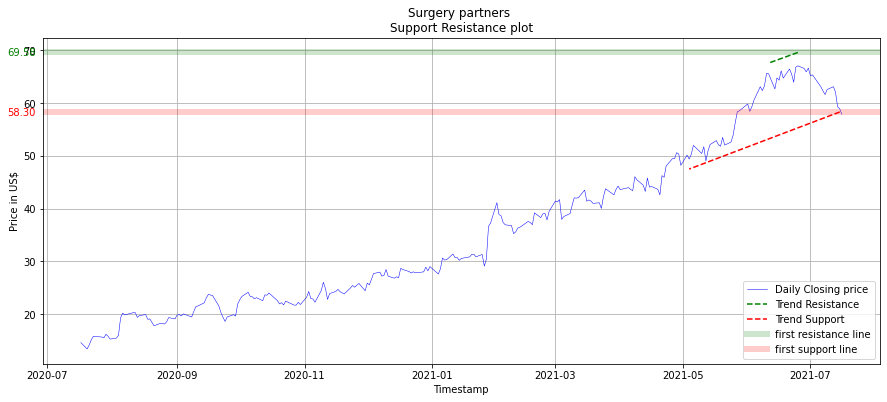

In [6]:
ticker = "SGRY"
class DataBase():
  def __init__(self, ticker, days):
    self.ticker = ticker
    data =yf.download(ticker, start='2020-01-01' )
    self.df = pd.DataFrame(data)
    pd.set_option("display.max_columns", None)
    self.df[self.df.index.dayofweek < 5]
    self.df= self.df[-days:]

  def quote(self):
    return self.df

db = DataBase(ticker, 252)
df = db.quote()
print(df.tail()); print()

pivot_high_1 = df['High'][-21:-1].max() # 4 weeks
pivot_high_2 = df['High'][-55:-22].max() # 6 weeks post 4 weeks
pivot_low_1 = df['Low'][-21:-1].min() # 4 weeks
pivot_low_2 = df['Low'][-55:-22].min() # 6 weeks post 4 weeks

a = [df['High'][-21:-1].idxmax(), pivot_high_1]
b = [df['High'][-55:-22].idxmax(), pivot_high_2]
a1 = [df['Low'][-21:-1].idxmin(), pivot_low_1]
b1 = [df['Low'][-55:-22].idxmin(), pivot_low_2]

x1_high_values = [a[0], b[0]]
y1_high_values = [a[1], b[1]]
x1_low_values = [a1[0], b1[0]]
y1_low_values = [a1[1], b1[1]]


plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.set_ylabel("Price in US$")
ax1.set_xlabel("Timestamp")
ax1.set_title("Surgery partners \nSupport Resistance plot")
ax1.plot('Adj Close', data=df, label = 'Daily Closing price', 
        color = 'b', linewidth = 0.5) # if we need thinner line
ax1.plot(x1_high_values, y1_high_values, color='g', linestyle ='--', 
         label = 'Trend Resistance')
ax1.plot(x1_low_values, y1_low_values, color='r', linestyle ='--',
         label = 'Trend Support')

ax1.axhline(y= pivot_high_1, color = 'g', linewidth=6, label = "first resistance line", alpha = 0.2)
ax1.axhline(y= pivot_low_1, color = 'r', linewidth=6, label = "first support line", alpha = 0.2)

trans = transform.blended_transform_factory(ax1.get_yticklabels()[0].get_transform(), ax1.transData)

ax1.text(0, pivot_high_1, "{:.2f}".format(pivot_high_1), color = 'g',
         transform=trans, ha='right', va='center')
ax1.text(0, pivot_low_1, "{:.2f}".format(pivot_low_1), color = 'r',
         transform=trans, ha='right', va='center')

ax1.legend(); ax1.grid(); plt.show()